In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def encode_columns(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
    
    df['registration_date'] = pd.to_datetime(df['registration_date'], dayfirst=False)

    return df

def create_last_registration_columns(df):
    df = df.sort_values(by=['user_id', 'registration_date'])
    df['last_registration_date'] = df.groupby('user_id')['registration_date'].shift(1)
    df['days_passed_last_registration'] = (df['registration_date'] - df['last_registration_date']).dt.days
    df['days_passed_last_registration'] = df['days_passed_last_registration'].fillna(0).astype(int)
    df['last_days_active_lifetime'] = df.groupby('user_id')['days_active_lifetime'].shift(1)
    df['last_days_active_lifetime'] = df['last_days_active_lifetime'].fillna(0).astype(int)

    return df


In [ ]:
df = pd.read_csv("data/previous_lives_training_data.csv")

columns_to_drop  = ['registration_channel_detailed', 'registration_country', 'registration_store', 'registration_platform_specific']

df = df.drop(columns=columns_to_drop)


df = encode_columns(df)
df = create_last_registration_columns(df)




df.head(2)


,user_id,registration_date,registration_season_day,is_payer_lifetime,days_active_lifetime,transaction_count_iap_lifetime,is_rewarded_video_watcher_lifetime,last_registration_date,days_passed_last_registration,last_days_active_lifetime
0,5,2022-04-21,26,0,1,0,0,NaT,0,0
1,5,2023-05-07,15,0,18,0,1,2022-04-21,381,1


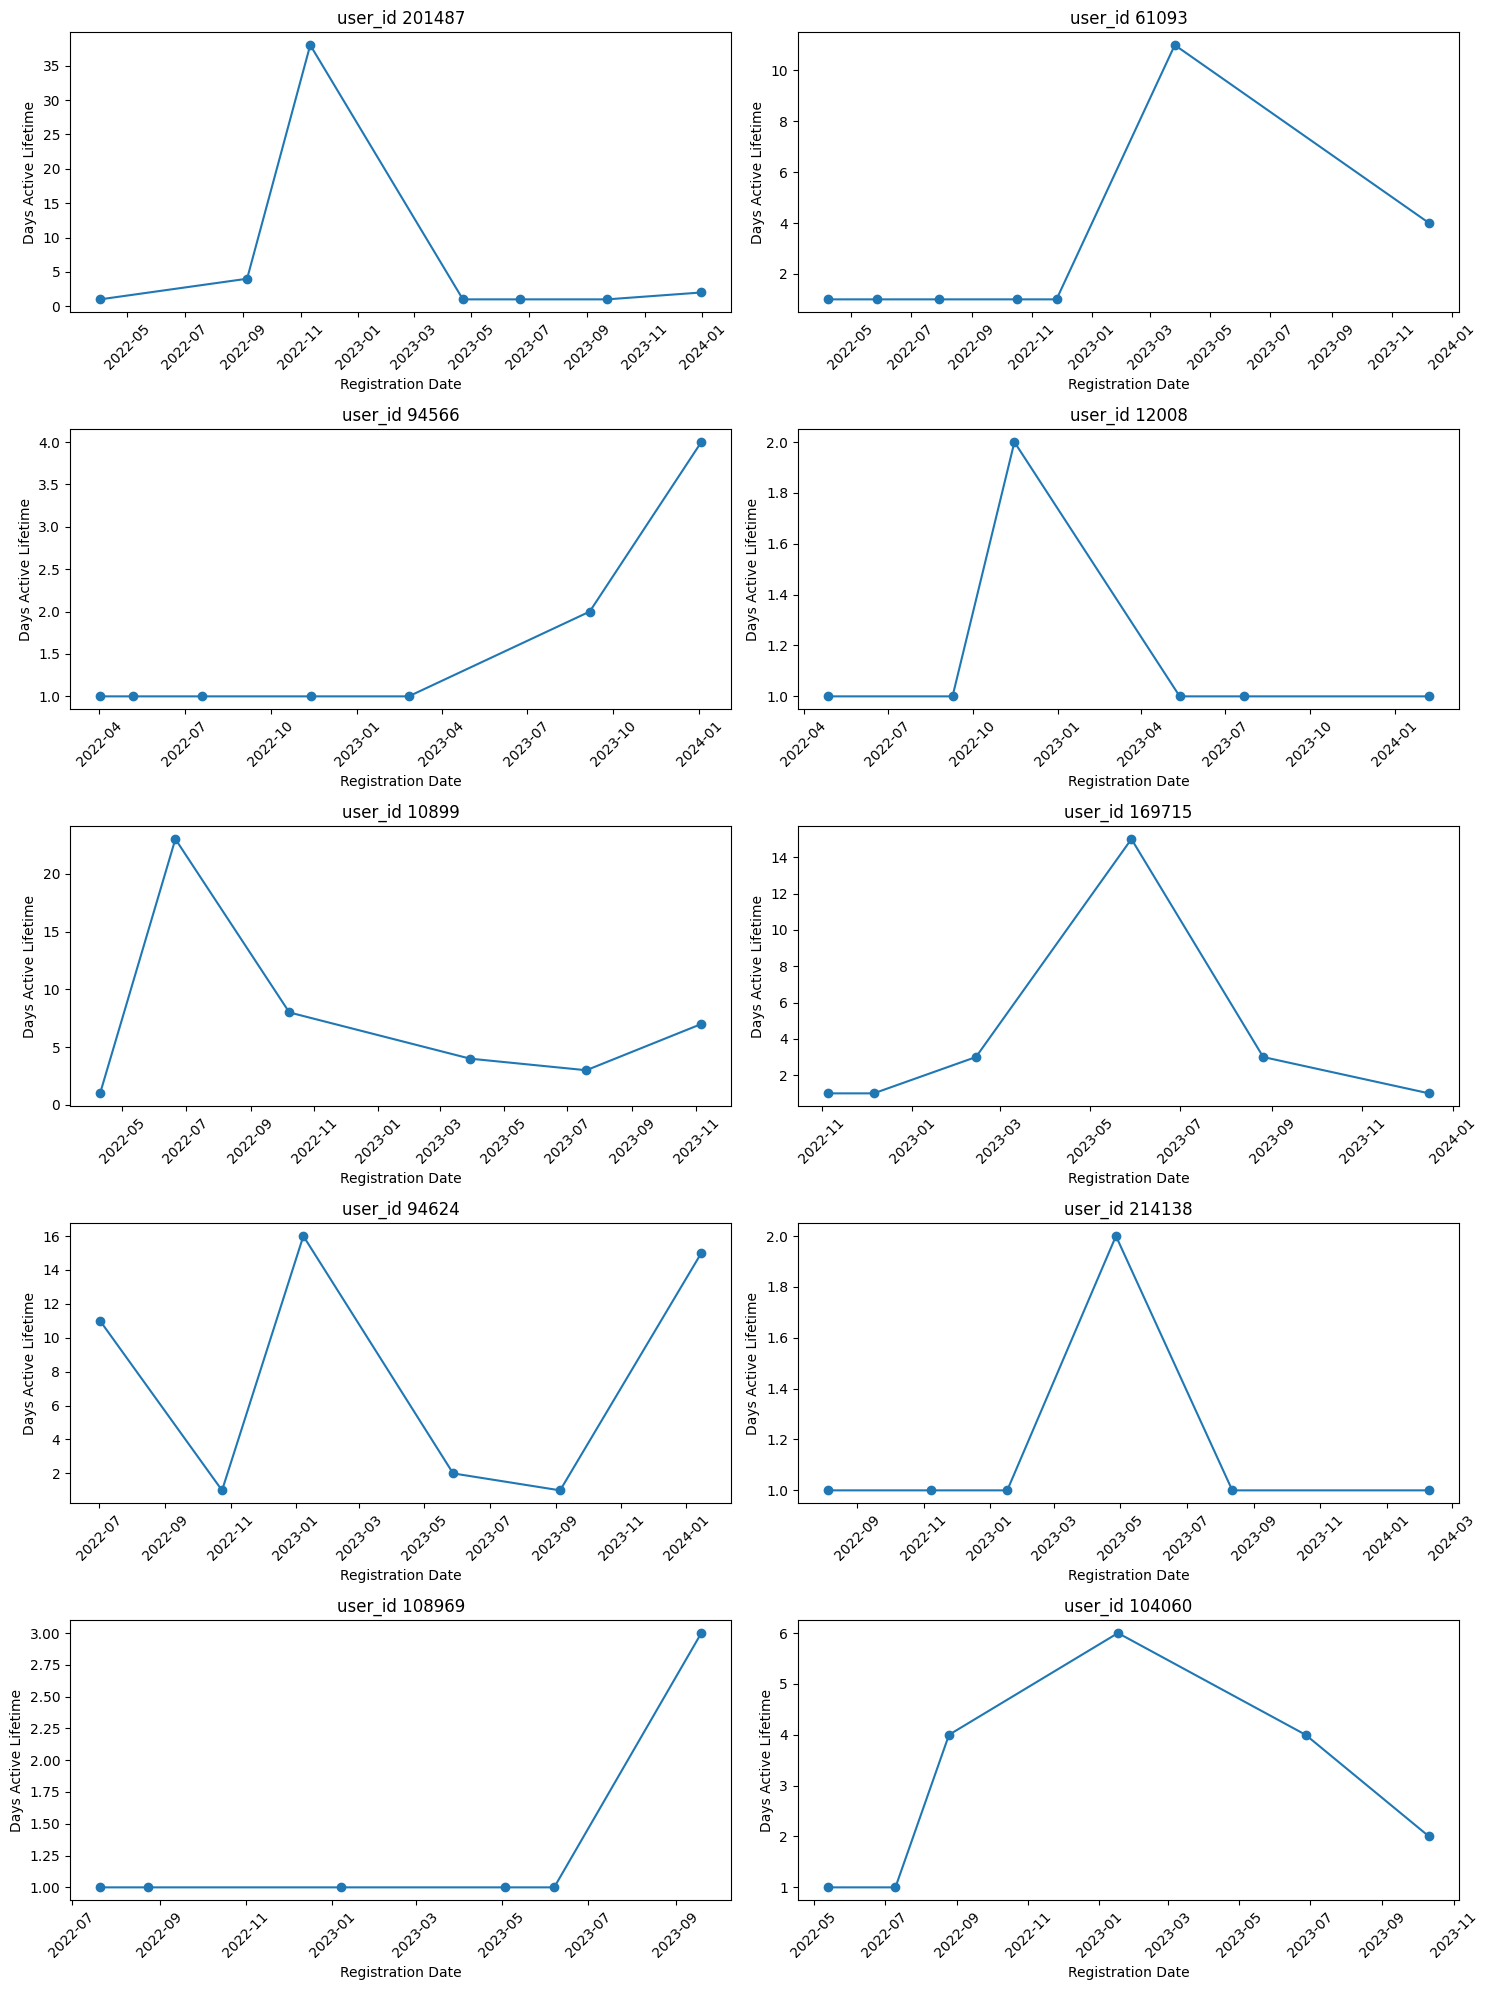

In [ ]:
import matplotlib.pyplot as plt


user_counts = df['user_id'].value_counts()
multi_row_users = user_counts[user_counts > 1].index[0:10] 


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))  
axes = axes.flatten()  


for i, user_id in enumerate(multi_row_users):

    user_data = df[df['user_id'] == user_id]
    

    user_data = user_data.sort_values(by='registration_date')
    

    axes[i].plot(user_data['registration_date'], user_data['days_active_lifetime'], marker='o')
    axes[i].set_title(f'user_id {user_id}')
    axes[i].set_xlabel('Registration Date')
    axes[i].set_ylabel('Days Active Lifetime')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


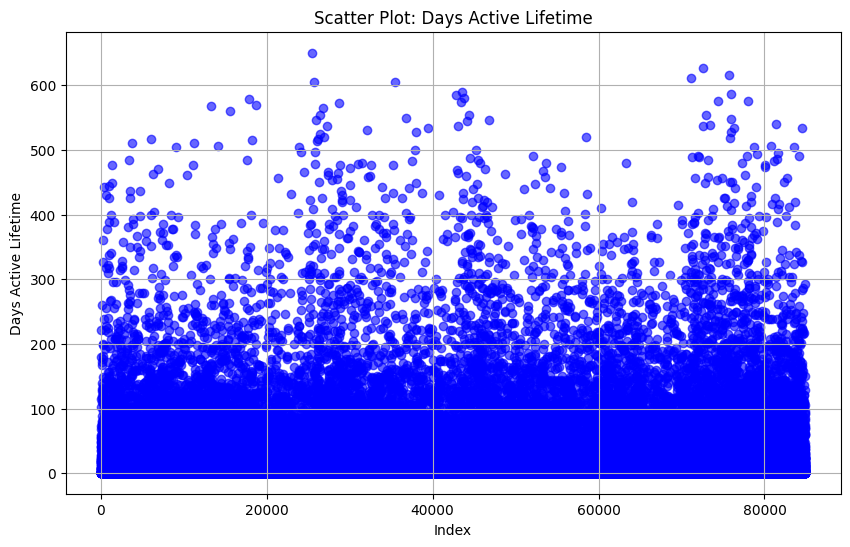

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['days_active_lifetime'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Days Active Lifetime')
plt.xlabel('Index')
plt.ylabel('Days Active Lifetime')
plt.grid(True)
plt.show()


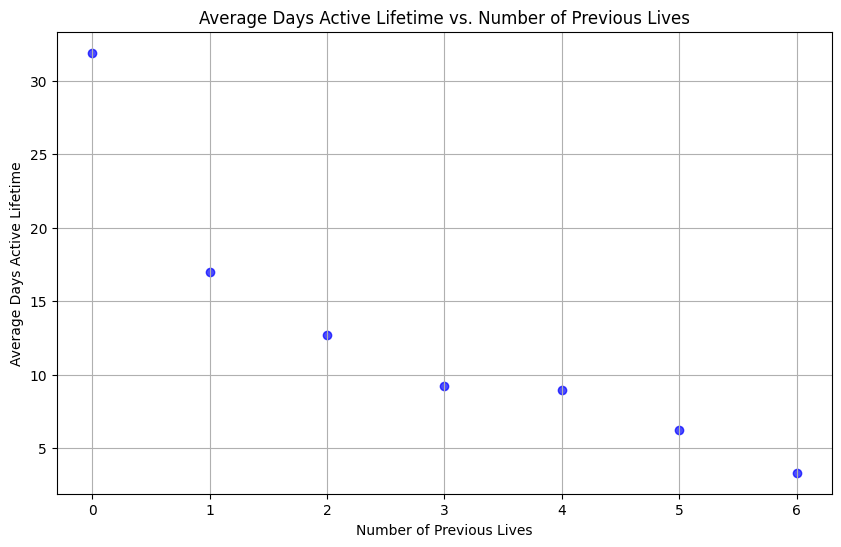

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = df.sort_values(by=['user_id', 'registration_date'])

# Kreiranje `num_previous_lives` za svakog korisnika
df['num_previous_lives'] = df.groupby('user_id').cumcount()


avg_days_active = df.groupby('num_previous_lives')['days_active_lifetime'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.scatter(avg_days_active['num_previous_lives'], avg_days_active['days_active_lifetime'], color='blue', alpha=0.7)
plt.title('Average Days Active Lifetime vs. Number of Previous Lives')
plt.xlabel('Number of Previous Lives')
plt.ylabel('Average Days Active Lifetime')
plt.grid(True)
plt.show()


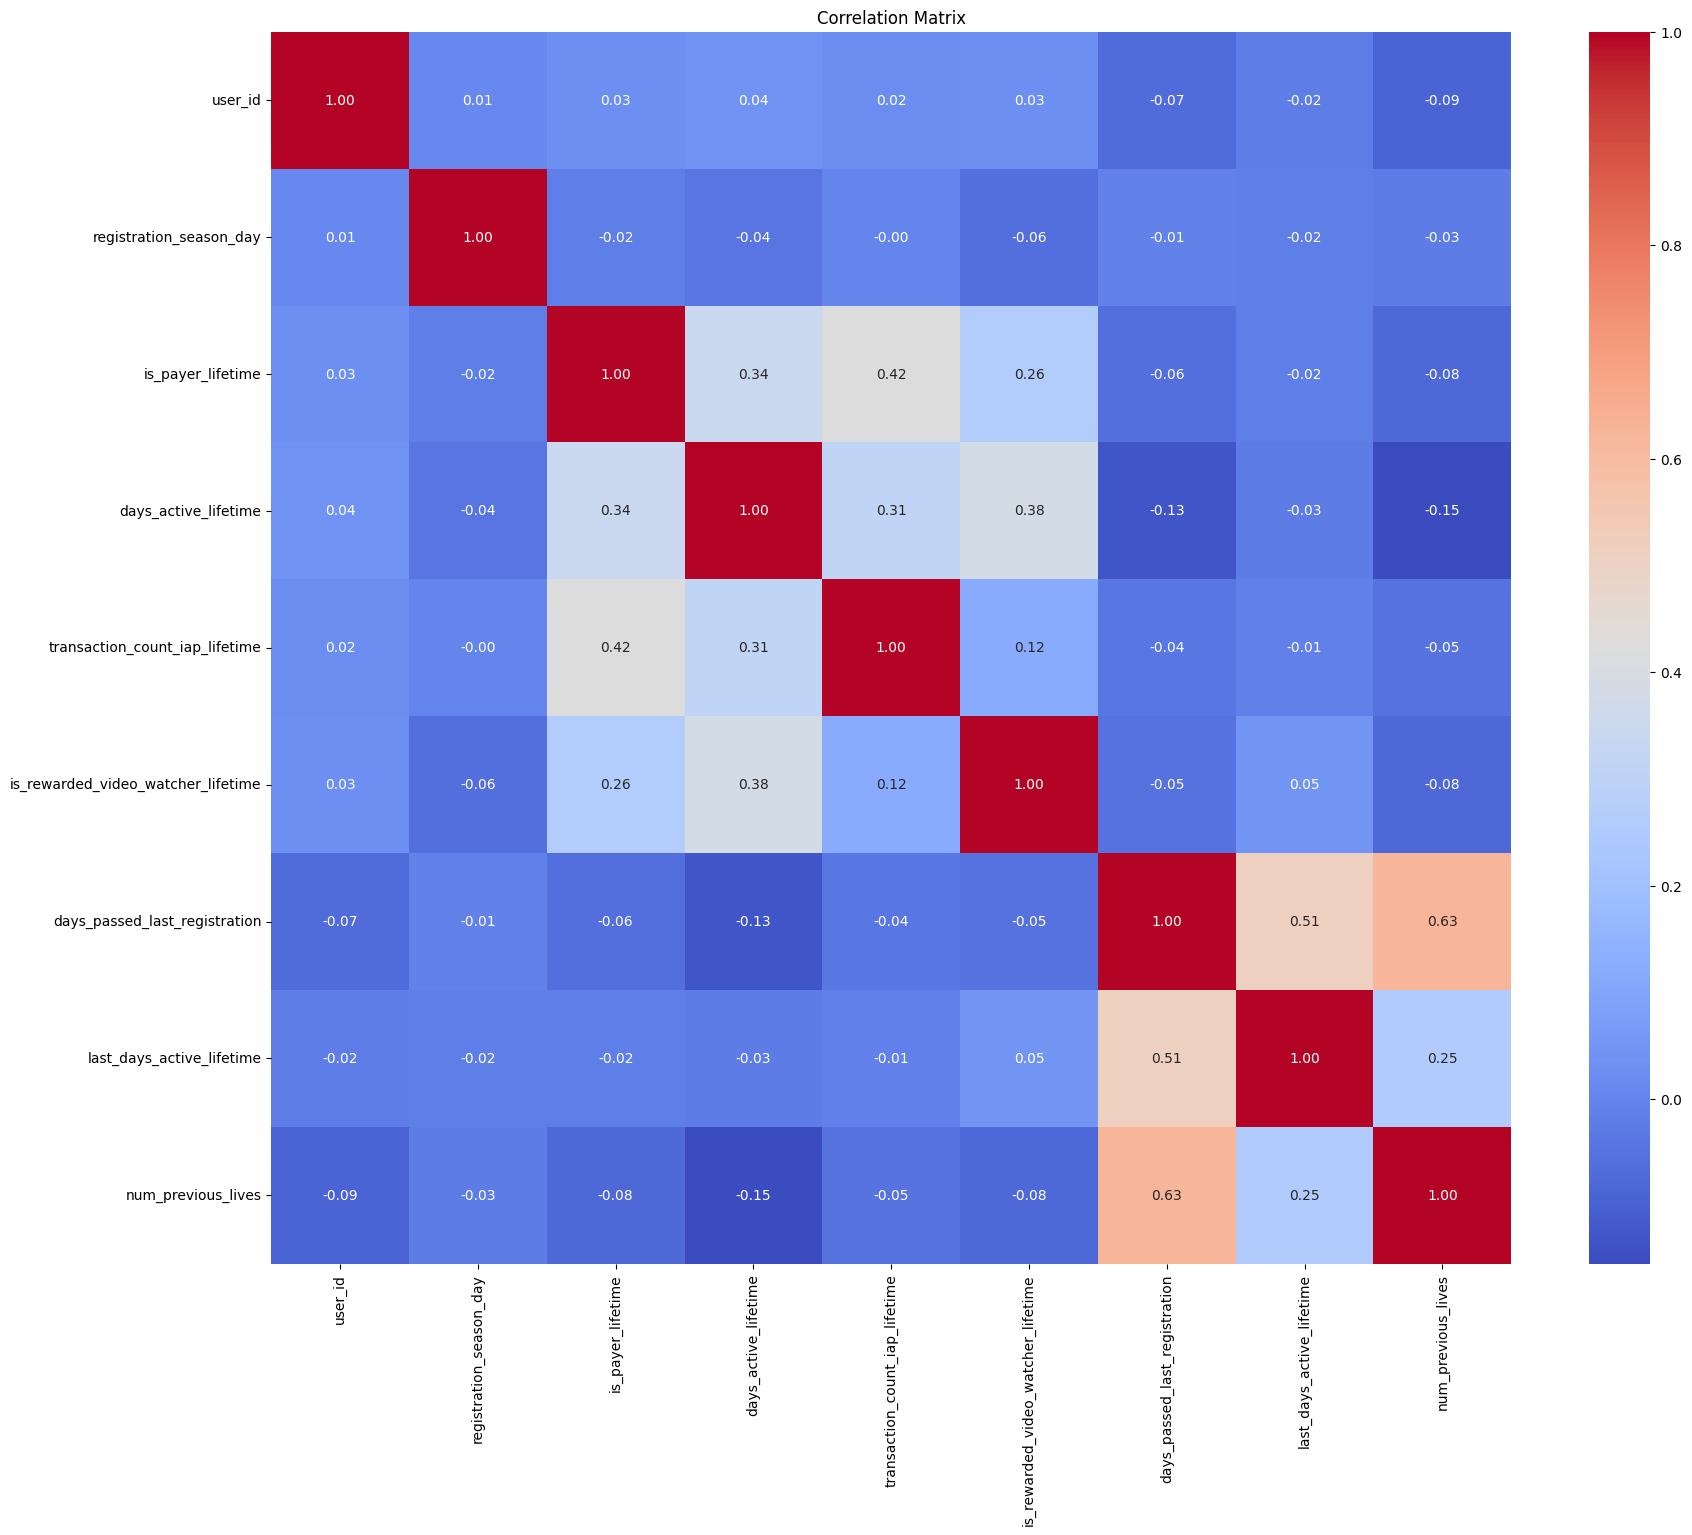

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include=["number"])


plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
